In [8]:
%matplotlib notebook

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.cm

import pandas as pd

from __future__ import division
from __future__ import print_function

In [180]:
1 / ( Ngrid**2  )

0.0005787037037037037

In [190]:
Ngrid = 24

aspect = 16 / 9
fig_height = 4

threshold = 1 / ( Ngrid**2  )

# Need to adjust size depending on Ngrid.
# For Ngrid=24 a value of 56 seems to work nicely
maxsize = 56

In [201]:
# Generate some random data to plot

# Let's use a simple cosine distribution
times = ( np.arccos( np.random.rand( 100000 )*2-1 ) / np.pi * 24 * 60 * 60 ).astype(int)

# And let's have 5 different types
types = np.random.randint( 5, size=len(times) )


data = pd.Series( types, index=pd.core.tools.datetimes.to_datetime( times, unit='s', ), name='Type' )
data.head()

1970-01-01 20:43:50    0
1970-01-01 08:32:14    3
1970-01-01 20:35:48    3
1970-01-01 15:15:32    1
1970-01-01 21:45:38    3
Name: Type, dtype: int64

In [202]:
def update_scatter( frame, scatt ):
    
    t, interactions = frame

    sizes = scatt.get_sizes() / 2
    colors = scatt.get_facecolor()
    
    dots_colors = interactions[ np.random.randn( len( interactions ) ) > threshold ]
    dots_to_update = np.random.randint( Ngrid**2, size=len(dots_colors) )
    
    colors[ dots_to_update ] = matplotlib.cm.viridis( ( dots_colors * ( Ncolors - 1 ) // ( Ntypes - 1 )  ) )
    sizes[ dots_to_update ] = maxsize

    scatt.set_sizes( sizes )
    
    return scatt,

<IPython.core.display.Javascript object>


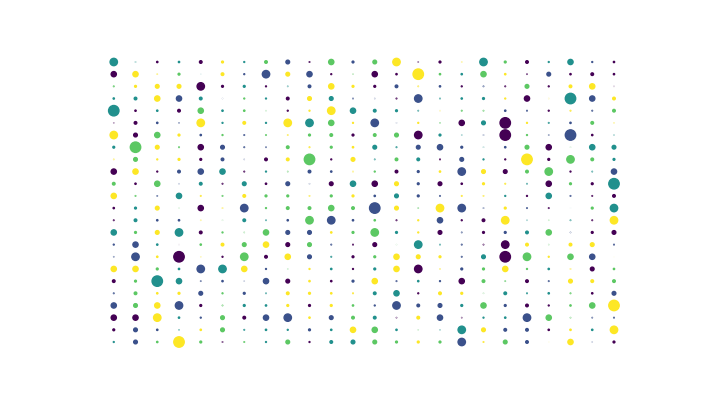

/home/marioaieie/Lib/miniconda3/envs/S2DS/lib/python3.6/site-packages/matplotlib/animation.py:971: UserWarning: MovieWriter ffmpeg unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)


In [206]:
plt.close('all')


fig, ax = plt.subplots( figsize=(fig_height*aspect, fig_height) )

x = y = np.arange( 0, Ngrid )
X, Y = np.meshgrid( x, y )

Ntypes = data.nunique()
Ncolors = matplotlib.cm.viridis.N

sizes = 0. * np.random.rand( Ngrid**2 )**2 #* maxsize
colors = np.random.randint( Ntypes, size=sizes.shape )
colors = matplotlib.cm.viridis( ( colors * ( Ncolors - 1 ) // ( Ntypes - 1 )  ) )

scatt = ax.scatter( X, Y, s=sizes, c=colors, edgecolors='face'  )

#ax.set_frame_on(False)
ax.axis('off')


dt = 15
frames = list( data.groupby( lambda x: x.hour + x.minute // dt / 60 , sort=True ) )

line_ani = animation.FuncAnimation( fig, update_scatter, frames=frames, fargs=( scatt, ), repeat=False,
                                    interval=100, blit=True )
line_ani.save( 'dots.mp4',  )

fig.savefig( 'dots_frame_final.png', dpi=300, )

In [144]:
frames = list( data.groupby( lambda x: x.hour + x.minute / 60, sort=True ) )

#t, interactions = frames[0]

#np.random.randint( Ngrid**2, size=np.sum( np.random.randn( len( interactions ) ) > threshold ) )
frames[-1][1].tail()

1970-01-01 23:49:00    0
Name: Type, dtype: int64

In [51]:
update_scatter( frames[1], scatt )

(<matplotlib.collections.PathCollection at 0x7fe98b3efdd8>,)

In [166]:
x = data.index[0]


x, x.hour, x.minute // 5 * ( 5 / 60 )

(Timestamp('1970-01-01 11:36:09'), 11, 0.8333333333333333)